# Kinematics: Describing the Motions of Spacecraft
- This notebook is intended to complement the coursera course "Kinematics: Describing the Motions of Spacecraft" (link given below).
- The notes in here are basic and all attempts will be made to add in the relvant sources, tips and notes that will enable an easier learning/understanding if possible.

Link: https://www.coursera.org/learn/spacecraft-dynamics-kinematics

In [1]:
# Import Relevant Libraries
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider 

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot


- Numpy:
- Matplotlib
- Plotly
- Sympy
- 

# Week 1 - Introduction to Kinematics
1. An Overview of Angular Velocity
2. An overview of Particle Kinematics and vector frames
4. Kinematic Transport Theorem

## 1.1) An overview of Angular Velocity

A small revision of the concept of angular velocity

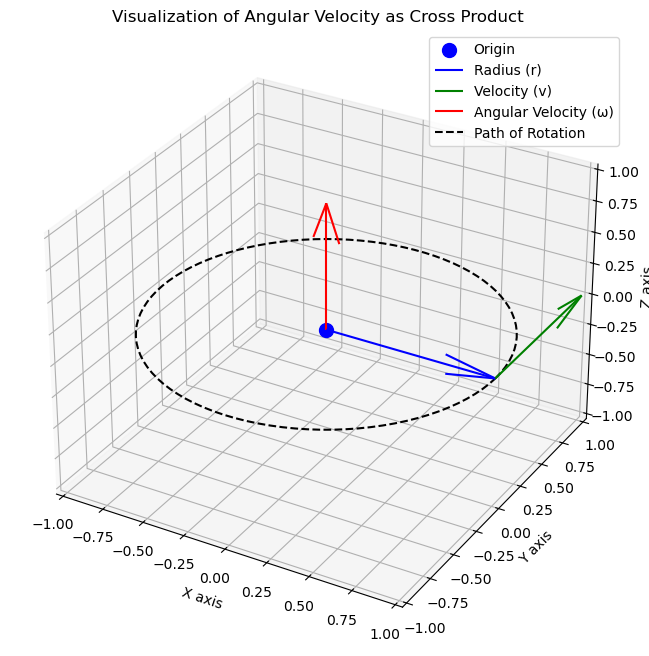

In [2]:
''' 
Visualizing angular velocity vector
'''

# Origin
origin = np.array([0,0,0])

# Define the radius vector (r) and tangential velocity vector (v) arbitrarily
r = np.array([1, 0, 0])  # Example: radius vector along the x-axis
v = np.array([0, 1, 0])  # Example: velocity vector along the y-axis

# Calculate the angular velocity vector (omega) as the cross product of r and v
omega = np.cross(r, v)

# Create a 3D plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plot a single point at the origin
ax.scatter(*origin, color='blue', s=100, label='Origin')

# Plot the radius vector (r)
ax.quiver(*origin, *r, color='blue', length=1, normalize=True, label='Radius (r)')

# Plot the tangential velocity vector (v)
ax.quiver(*r, *v, color='green', length=1, normalize=True, label='Velocity (v)')

# Plot the angular velocity vector (omega)
ax.quiver(*origin, *omega, color='red', length=1, normalize=True, label='Angular Velocity (ω)')

# Plotting a dotted circular path for rotation
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = np.zeros_like(t)
# Here, we simply plot the circle in the XY-plane
ax.plot(x, y, z, '--k', label='Path of Rotation')

# Setting the plot appearance
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Visualization of Angular Velocity as Cross Product')
ax.legend()

plt.show()

<ins>Dynamics Notes<ins>:
- Note that if the origin is <0, 0, 0>, and an object is 'circling' about the origin at some distance away as represented by Radius Vector, r, the angular velocity vector is the cross product of the r with tangential velocity vector, v

- This is true for any arbitrary vector oriented in arbitrarily in space.

- The absolute of the cross product is the magnitude of angular velcoity, and the direction is orthornormal to both r and v.

- The angular velocity vector shows the direction, or rather, the axis about which the object is rotating (akin to a skewer) and is best represented at the point around which an object is circling/orbitng


## 1.2) An overview of Particle Kinematics and Vector Frames

A high level overview of what is meant by reference frames and conventions used. 

A basic note of programming as well.

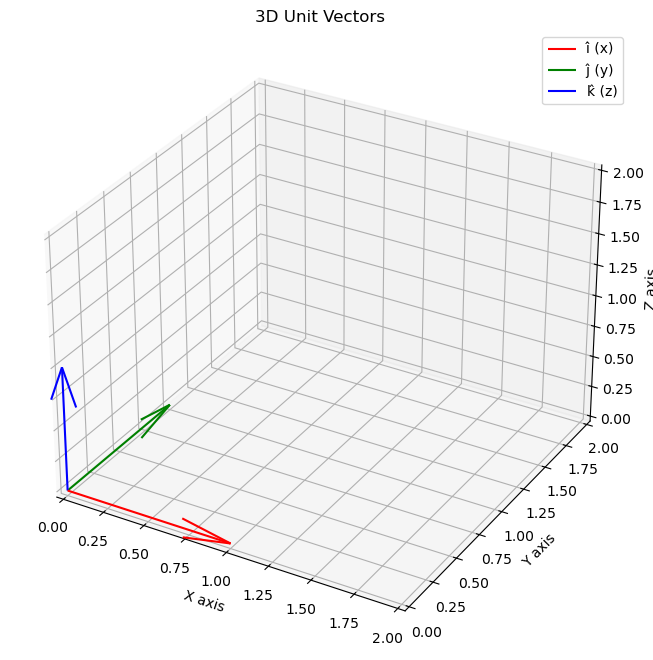

In [3]:
''' 
Visualizing the basic unit vector triad
'''

# Origin for Triad of Unit Vectors
origin = np.array([0,0,0])

# Unit Vectors for the triad
i_hat = np.array([1,0,0])
j_hat = np.array([0,1,0])
k_hat = np.array([0,0,1])

# Directly create a 3D plot
fig = plt.figure(figsize=(8,16))                          # creates a new canvas upon which figure is drawn/plotted
ax = fig.add_subplot(111, projection='3d')                # Directly specifying the 3D projection

# Plot the unit vectors
ax.quiver(*origin, *i_hat, length=1, color='r', label='î (x)')
ax.quiver(*origin, *j_hat, length=1, color='g', label='ĵ (y)')
ax.quiver(*origin, *k_hat, length=1, color='b', label='k̂ (z)')

# Setting plot limits and labels
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Unit Vectors')
ax.legend()

plt.show()

<ins>Dynamics Notes<ins>:

- Note that wherever the frames are spatially, it is appropriate to 'translate' them to the reference frame just to see how it is oriented with respect to reference
- Every frame, by convention is right handed. Align your right hand along the i-direction, curl your fingers toward j-vector to obtain the direction of k-vector
- Positive angular direction is typically defined in the counter-clockwise direction when 'looking' down along the axis of rotation

**Python Coding Notes**:
- The asterisk (*) operator, when used in front of a variable like *origin in a function call, performs argument unpacking. This means it takes a sequence (like a list, tuple, or array) and expands it into individual positional arguments in the function call.

- When you call plt.figure(), you're essentially creating a new blank canvas on which plots can be drawn.

- The axes (ax) represent an individual plot or graph. While "figure" is the canvas, "axes" can be thought of as the frame within which you draw your plot. You can have multiple frames (axes) within one canvas (figure).

- add_subplot is a method used to add an axes to the figure. It can be used to create a subplot within the figure. Even if you're only creating one plot, you're technically adding a single subplot to the figure. The projection='3d' argument is crucial for 3D plots. It tells Matplotlib that this particular axes (or subplot) is going to be used for 3D plotting. Without this, Matplotlib would prepare the axes for a 2D plot by default.

- The add_subplot method is used to add a subplot to the current figure. It has a few different ways it can be called, but one common way is using a three-digit integer as its argument; The first digit represents the number of rows of subplots in the figure, The second digit represents the number of columns of subplots, The third digit represents the index of the current subplot (which subplot it is, counting from left to right and then top to bottom). add_subplot(111) means you want a grid of 1 row by 1 column, and you're adding the first subplot.
      

- The plot limits quite literally limits the view from a range of 0 to 1. Plot Labels are Self-explanatory

- For more about quiver plot: https://www.geeksforgeeks.org/quiver-plot-in-matplotlib/

## 1.3) Kinematic Transport Theorem

A note of Kinematic Transport Theorem and how it relates 2 frames through angular velcity vector.

The **Kinematic Transport Theorem** provides a crucial relationship in dynamics, particularly for understanding how a vector's time derivative in one frame relates to its time derivative in another frame, through the influence of angular velocity. This theorem is foundational for analyzing the motion of bodies in rotating reference frames, such as in aerospace dynamics and robotics.

### I. Theorem Statement
Given a vector $\mathbf{V}$ observed from two different reference frames:
- An inertial frame, denoted as $N$
- A rotating frame, denoted as $E$, with an angular velocity $\boldsymbol{\omega}$ relative to $N$

The time derivative of $\mathbf{V}$ in the inertial frame $N$ is equal to the time derivative in the rotating frame $E$, plus the cross product of the angular velocity $\boldsymbol{\omega}$ of frame $E$ relative to $N$ and the vector $\mathbf{V}$ itself:

$$ ^N\dot{\mathbf{V}} = ^E\dot{\mathbf{V}} + \boldsymbol{\omega} \times \mathbf{V} $$

### II. Components of the Theorem
- $^N\dot{\mathbf{V}}$: The time derivative of $\mathbf{V}$ with respect to the inertial frame $N$.
- $^E\dot{\mathbf{V}}$: The time derivative of $\mathbf{V}$ with respect to the rotating frame $E$.
- $\boldsymbol{\omega}$: The angular velocity vector of the rotating frame $E$ relative to the inertial frame $N$.
- $\mathbf{V}$: The vector of interest, which could represent any physical quantity, such as position or velocity.
- $\times$: Denotes the cross product operation.

### III. Significance
This theorem is essential for:
- Transforming physical quantities between different reference frames.
- Understanding the effects of rotation on vector quantities.
- Designing and analyzing systems in aerospace engineering, robotics, and other fields involving rotational dynamics.

# Week 2 - Rigid Body Kinematics I
1. Rigid Body Kinematics
2. Directional Cosine Matrices (DCMs)
3. Euler Angles

## 2.1) Rigid Body Kinematics Overview

Rigid body kinematics is the study of the motion of rigid bodies without considering the forces that cause the motion. It involves analyzing the position, velocity, and acceleration of any point in the rigid body.

### Spatial Coordinates vs. Attitude Coordinates

- **Spatial Coordinates**: 
  - Describe the position of the rigid body in space.
  - Typically represented by a point in a 3D coordinate system, such as the center of mass in Cartesian coordinates \( (x, y, z) \).
  - Do not provide information about the orientation of the body.

- **Attitude Coordinates**: 
  - Describe the orientation of the rigid body in space.
  - Represented by a set of parameters like Euler angles, quaternions, or rotation matrices.
  - Essential for understanding how the body is rotated with respect to a reference frame.

### Importance in Rigid Body Kinematics

Understanding both spatial and attitude coordinates is crucial for comprehensive kinematic analysis:

- **Spatial Coordinates** allow us to track the trajectory of a rigid body's center of mass or any other specific point.
- **Attitude Coordinates** are vital for describing the rotational behavior of the body, which, combined with spatial coordinates, provides a complete picture of the body's pose in space.

### Applications

- In spacecraft dynamics, attitude coordinates are used to determine the spacecraft's orientation, which is necessary for tasks such as solar panel alignment and antenna pointing.
- In robotics, joint angles serve as attitude coordinates that define the orientation of various parts of a robot relative to each other and to the workspace.

## 2.2) Directional Cosine Matrices (DCMs)

In the study of spacecraft kinematics, the relationship between different coordinate frames is essential. The body frame (b-frame) and navigation frame (n-frame) are two such coordinate systems used as an example in this notebook.

However, in reality, you can have more than 2 frames if you are designing something complicated (like a robot's fingers or if you are trying to be doctor octopus)



### <ins>Frame Base Vectors<ins>

The base vectors of the b-frame and n-frame are related through a Direction Cosine Matrix (DCM), which is defined by the cosine of angles between the respective axes of these frames.

A **vectrix** is a matrix of vectors. The vectrix for the navigation frame (n-frame) and the body frame (b-frame) are represented as:

$$
\{ \mathbf{n} \} = \begin{bmatrix}
\hat{n}_1 \\
\hat{n}_2 \\
\hat{n}_3
\end{bmatrix}, \quad
\{ \mathbf{b} \} = \begin{bmatrix}
\hat{b}_1 \\
\hat{b}_2 \\
\hat{b}_3
\end{bmatrix}
$$

### <ins>DCM Definition<ins>

The DCM, denoted as $\mathbf{C}$, transforms coordinates from the b-frame to the n-frame (read from RHS to LHS):

$$
\{ \mathbf{n} \} = [C] \{ \mathbf{b} \}
$$

This transformation is described by the matrix:

$$
[C] = \begin{bmatrix}
\cos \alpha_{11} & \cos \alpha_{12} & \cos \alpha_{13} \\
\cos \alpha_{21} & \cos \alpha_{22} & \cos \alpha_{23} \\
\cos \alpha_{31} & \cos \alpha_{32} & \cos \alpha_{33}
\end{bmatrix}
$$

where $\alpha_{ij}$ represents the angle between the $i^{th}$ axis of the b-frame and the $j^{th}$ axis of the n-frame.

### <ins>Relationship Between Frames<ins>

Each vector in the b-frame is related to the n-frame through the corresponding elements of the DCM:

$$
\begin{align*}
\hat{b}_1 &= \cos \alpha_{11} \hat{n}_1 + \cos \alpha_{12} \hat{n}_2 + \cos \alpha_{13} \hat{n}_3 \\
\hat{b}_2 &= \cos \alpha_{21} \hat{n}_1 + \cos \alpha_{22} \hat{n}_2 + \cos \alpha_{23} \hat{n}_3 \\
\hat{b}_3 &= \cos \alpha_{31} \hat{n}_1 + \cos \alpha_{32} \hat{n}_2 + \cos \alpha_{33} \hat{n}_3 \\
\end{align*}
$$

The elements of the DCM can be understood as:

$$
C_{ij} = \cos (\angle(\hat{b}_i, \hat{n}_j)) = \hat{b}_i \cdot \hat{n}_j
$$

indicating that each element of the DCM is the dot product of the vectors from each frame, representing the cosine of the angle between them. Note that $ \hat{b}_i $ and $ \hat{n}_j $ are unit vectors!

### <ins>Properties of the Direction Cosine Matrix (DCM)<ins>

The Direction Cosine Matrix (DCM), denoted as $[C]$, has some unique properties due to its definition and the orthogonality of the coordinate frames it relates. One of the key properties is that the inverse of a DCM is simply its transpose. This property can be explained as follows:

#### Orthogonality

- A DCM is an orthogonal matrix, which means its columns (and rows) are orthogonal unit vectors. Mathematically, this is represented by:

$$
[C]^T [C] = [I]
$$

- Here, $[I]$ is the identity matrix. The columns of $[C]$ represent the basis vectors of one coordinate frame expressed in another. Since these basis vectors are orthogonal and normalized, their dot product (which is what matrix multiplication represents) is 1 if the vectors are the same (diagonal of the identity matrix) and 0 if they are different (off-diagonal elements of the identity matrix).

#### Inverse and Transpose

- For any orthogonal matrix, the transpose is equal to its inverse. This is because the dot product of each pair of different columns (or rows) is zero, and the dot product of each column (or row) with itself is one. Therefore:

$$
[C]^{-1} = [C]^T
$$

- This property is particularly useful because it simplifies many computations. Instead of performing a potentially complex matrix inversion, one can simply transpose the matrix.

- When we multiply a DCM by its transpose, we get the identity matrix:

$$
[C] [C]^T = [C]^T [C] = [I]
$$

- This equation confirms that the transpose of the DCM serves as its inverse. The identity matrix, which is the result of this multiplication, has ones on its diagonal and zeros elsewhere, which aligns with the definition of the identity matrix in linear algebra.

These properties of the DCM are fundamental in rigid body kinematics and are widely used in applications such as spacecraft attitude control, where efficient and reliable computational methods are essential. **Note that in the context of rigid body  kinematics, DCM is always 3x3.**

#### Determinant of a DCM

- The determinant of a Direction Cosine Matrix (DCM) has an important geometric interpretation in the context of coordinate transformations.

- For a proper rotation matrix, which describes a rotation without any reflection, the determinant is equal to +1:

$$
\det([C]) = +1
$$

- This property signifies that the orientation transformation preserved by the DCM does not include a reflection. A determinant of +1 ensures that the coordinate transformation maintains a right-handed coordinate system after the rotation. In other words, the volume and the 'handedness' of the space remain unchanged.

- A DCM with a determinant of -1 would represent an improper rotation, which includes a reflection across a plane, leading to a change in the orientation of the coordinate system from right-handed to left-handed or vice versa.

- Therefore, in the study of rigid body kinematics, especially in aerospace applications where maintaining the correct 'handedness' of the coordinate system is crucial, DCMs are required to have a determinant of +1 to be considered valid for describing the spacecraft's attitude.

#### Composition of DCMs

- The composition property of Direction Cosine Matrices (DCMs) allows us to relate three different coordinate frames. For example, if we have a navigation frame (N-frame), a body frame (B-frame), and a reference frame (R-frame), we can define the transformation from the N-frame to the B-frame with a DCM denoted as $[BN]$, and from the B-frame to the R-frame with a DCM denoted as $[RB]$.

- The DCM that represents the transformation from the N-frame directly to the R-frame, denoted as $[RN]$, can be found by multiplying the two DCMs:

$$
[RN] = [RB] \cdot [BN]
$$

- In this expression, $[BN]$ transforms a vector defined in the N-frame to the B-frame, and $[RB]$ further transforms that vector from the B-frame to the R-frame. The result, $[RN]$, is the DCM that maps vectors directly from the N-frame to the R-frame.

- This property is based on the fact that rotations are associative; thus, the order of the multiplication of matrices matters, but they can be grouped in any order.

- It's important to note that while the DCMs themselves are added or multiplied, the vectors they transform are multiplied by the DCMs to achieve the new coordinates in the different frames. The term 'addition' in this context does not refer to the arithmetic addition of matrices but to the combination of transformations.

- This DCM composition is used extensively in aerospace engineering to describe the orientation of a spacecraft in an inertial reference frame by sequentially applying transformations from the spacecraft's body frame to an intermediate frame and then to the inertial frame.

### <ins>Kinematic Differential Equation of DCM<ins>

Kinematic differential equation of DCM is critical in understanding the motion of a rigid body in terms of its rotation. 
- The 'kinematic' aspect relates to the position description of the body. 
- The 'differential equation' part pertains to the time rate of change of the body's orientation.

#### Understanding Kinematic Differential Equation

The kinematic differential equation for the DCM, represented as $[C]$, is a fundamental expression that relates the body's angular velocity to the rate of change of its orientation:

$$
\dot{[C]} = \frac{d[C]}{dt}
$$

This equation is essential because it tells us how the DCM, which encodes the body's orientation, changes over time.

#### Evolution of the DCM Over Time

The body's angular velocity vector $\boldsymbol{\omega}$ is crucial as it dictates how the orientation evolves. It can be represented in the body frame as:

$$
\boldsymbol{\omega} = \omega_1 \mathbf{\hat{b}}_1 + \omega_2 \mathbf{\hat{b}}_2 + \omega_3 \mathbf{\hat{b}}_3
$$

Here, $\omega_1, \omega_2,$ and $\omega_3$ are the components of the angular velocity in the body frame, and $\mathbf{b}_1, \mathbf{b}_2,$ and $\mathbf{b}_3$ are the unit vectors along the body's principal axes.

#### Deriving the Body Frame Vectrix differential Equation

To observe how the body frame vectors evolve as seen by the inertial frame, we differentiate the vectrix of body frame orientation vectors w.r.t time. Of course, at this point, the kinematic transport theorem is invoked to related the body frame vectors to an inertial frame,

$$
^N\frac{d\hat{\mathbf{b}}_i}{dt} = ^B\frac{d\hat{\mathbf{b}}_i}{dt} + \boldsymbol{\omega}_{B/N} \times \hat{\mathbf{b}}_i
$$

Note that the first term in RHS goes to zero, the unit vectors in the body frame do not change w.r.t. time within the frame. So the remaining terms is the cross-product of the angular velcoity vector $\boldsymbol{\omega}_{B/N}$ with the body frame unit vectors ${\mathbf{b}}_i$.

Now at this juncture, it is important to introduce the matrix cross-product operator. Fundamentally what it does is to 'convert' the vector into a skew-symmetric matrix so that matrix combination is done. The skew-symmetric property of the matrix cross-product operator is defined by:

$$
[\boldsymbol{\tilde{x}}] = \begin{bmatrix}
0 & -x_3 & x_2 \\
x_3 & 0 & -x_1 \\
-x_2 & x_1 & 0
\end{bmatrix}
$$

This operator is used to represent the cross product in matrix form, and it is essential for expressing the kinematic equations in terms of matrix operations.

Introducing the cross-product operator in matrix form allows us to express the body frame vectrix differential equation:
$$
^{N}\frac{d\{\mathbf{b}\}}{dt} = -\boldsymbol[{\tilde{\omega}}]\{\mathbf{b}\}
$$

Here, $\boldsymbol{\tilde{\omega}}$ is the skew-symmetric matrix of the angular velocity, and the superscript $^N$ denotes differentiation in the inertial frame.



#### Relating to the Inertial Frame

The kinematic differential equation describes the time rate of change of the Direction Cosine Matrix (DCM) which relates the orientation of the body frame to the inertial frame over time.

We start by taking the inertial derivative of the body frame vectors $\{\hat{b}\} = [C]\{\hat{n}\}$:

$$
^N\frac{d\{\hat{\mathbf{b}}\}}{dt} = -\frac{d([C]\{\hat{\mathbf{n}}\})}{dt} = -\frac{d[C]}{dt} \{\hat{\mathbf{n}}\} - [C]^N\frac{d\{\hat{\mathbf{n}}\}}{dt} = \dot{[C]}\{\hat{\mathbf{n}}\}
$$
This leads to:

$$
^N\frac{d\{\hat{b}\}}{dt} = -[\boldsymbol{\tilde{\omega}}]\{\hat{b}\} = -[\boldsymbol{\tilde{\omega}}][C]\{\hat{n}\} =  [\dot{C}] \{\hat{n}\}
$$

$$
(\dot{[C]} + [\boldsymbol{\tilde{\omega}}][C])\{\hat{n}\} = 0
$$

Because the orientation must hold for any reference frame, we find the kinematic differential equation for the DCM:

$$
\dot{[C]} = -[\boldsymbol{\tilde{\omega}}][C]
$$

This equation allows us to track how the DCM, and thus the orientation of the body, evolves over time given its angular velocity $\boldsymbol{\omega}$.

#### An Interesting Fact

An interesting fact about DCMs is that for any $N \times N$ orthogonal matrix, the product of the matrix and its transpose's time derivative is always zero when using the kinematic differential equation:

$$
\frac{d}{dt}([C][C]^T) = \dot{[C]}[C]^T + [C]\dot{[C]}^T = 0
$$

Substituting the differential equation yields:

$$
\frac{d}{dt}([C][C]^T) = -\boldsymbol{\tilde{\omega}}[C][C]^T - [C]\boldsymbol{\tilde{\omega}}^T[C]^T
$$

Simplifying further, we obtain:

$$
\frac{d}{dt}([C][C]^T) = -\boldsymbol{\tilde{\omega}} + \boldsymbol{\tilde{\omega}} = 0
$$

This demonstrates that the DCM's orthogonality property is preserved over time, a crucial fact in rigid body kinematics.

These kinematic differential equations form the backbone of attitude dynamics, allowing engineers and scientists to model and predict the rotational behavior of aerospace vehicles and other systems.

### <ins>General Steps Involved in Using Direction Cosine Matrices (DCMs)<ins>

Direction Cosine Matrices (DCMs) provide a compact and efficient method for representing and computing the orientation of a rigid body in three-dimensional space. The construction and utilization of DCMs involve several key steps:

### _Step 1: Define Coordinate Frames_

- Establish the body-fixed frame (often denoted as $b-frame$) and the reference frame (often denoted as $n-frame$ for the navigation frame).
- Identify the axes of each frame. For example, $b_1, b_2, b_3$ for the body frame and $n_1, n_2, n_3$ for the navigation frame.

### _Step 2: Determine the Direction Cosines_

- Calculate the cosines of the angles between each axis of the two frames.
- These angles define the relationship between the frames and form the elements of the DCM.

### _Step 3: Construct the DCM_

- Form the DCM by arranging the direction cosines in a matrix as follows:

$$
[C]_{BN} = \begin{bmatrix}
\cos(\angle(b_1, n_1)) & \cos(\angle(b_1, n_2)) & \cos(\angle(b_1, n_3)) \\
\cos(\angle(b_2, n_1)) & \cos(\angle(b_2, n_2)) & \cos(\angle(b_2, n_3)) \\
\cos(\angle(b_3, n_1)) & \cos(\angle(b_3, n_2)) & \cos(\angle(b_3, n_3))
\end{bmatrix}
$$

- Here, $[C]_{BN}$ represents the DCM that describes the orientation of the $b-frame$ relative to the $n-frame$.

### _Step 4: Use the DCM for Vector Transformation_

- Apply the DCM to transform vectors from the body frame to the navigation frame and vice versa.
- For a vector $\mathbf{V}_b$ in the body frame, its representation in the navigation frame is given by $\mathbf{V}_n = [C]_{BN} \mathbf{V}_b$.

### _Step 5: Apply DCM to Attitude Kinematics_

- Use the DCM to derive equations that describe the time evolution of the body's orientation.
- The kinematic differential equation involving DCM is $\dot{[C]}_{BN} = [\boldsymbol{\tilde{\omega}}] [C]_{BN}$, where $\boldsymbol{\omega}$ is the body's angular velocity and $[\boldsymbol{\tilde{\omega}}]$ is its skew-symmetric matrix.

### _Step 6: Update DCM Over Time_

- Integrate the kinematic differential equation to update the DCM over time, accounting for the body's rotational dynamics.

By following these steps, one can effectively construct and utilize DCMs for various applications in aerospace engineering, such as spacecraft attitude determination, control system design, and simulation of rigid body motion.

In [4]:
# Step 1: Define Coordinate Frames

# Inertial frame (n-frame)
n_frame = np.eye(3)

# Body-fixed frame (b-frame)
b_frame = n_frame

print(f"Body-fixed frame (b-frame): \n{b_frame}")
print(f"\nNavigation frame (n-frame): \n{n_frame}")

print("\n------------------------------------------------")

# Rotation matrix for a 45-degree rotation around the z-axis
rotation_matrix_z = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4), 0],
                              [np.sin(np.pi/4), np.cos(np.pi/4), 0],
                              [0, 0, 1]])

# Apply the rotation to the n-frame to establish the b-frame
b_frame = rotation_matrix_z.dot(n_frame)

print(f"\nBody-fixed frame (b-frame): \n{b_frame}")
print(f"\nNavigation frame (n-frame): \n{n_frame}")

Body-fixed frame (b-frame): 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Navigation frame (n-frame): 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

------------------------------------------------

Body-fixed frame (b-frame): 
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]

Navigation frame (n-frame): 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [5]:
# Step 2: Determining Direction Cosines

# Calculate the direction cosines between the b-frame and n-frame axes
# This is done by taking the dot product of the unit vectors of b-frame with those of the n-frame

direction_cosines = np.dot(b_frame.T, n_frame)

print("Direction Cosine Matrix (DCM) from b-frame to n-frame based on the dot product:")
print(direction_cosines)

Direction Cosine Matrix (DCM) from b-frame to n-frame based on the dot product:
[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


## 2.3) Euler Angles

Euler Angles are pivotal in describing the orientation between two coordinate frames through three sequential rotations. Commonly used sequences like the (3-2-1) sequence, correspond to yaw, pitch, and roll, respectively, offering an intuitive approach for visualizing small rotations in aerospace applications.


### <ins>Introduction to Euler Angles<ins>

Euler angles are a method for describing the orientation of a rigid body in three-dimensional space. They provide a way to express the angular position of a body through three sequential rotations around specified axes, named after the Swiss mathematician Leonhard Euler, who introduced them. Euler angles are widely used in various fields such as robotics, aerospace, computer graphics, and physics for tasks that involve rotation and orientation of objects.

### Definition and Conventions

Euler angles consist of three angles, typically denoted as:

- **Roll (ϕ or φ):** Rotation about the body's X-axis.
- **Pitch (θ or θ):** Rotation about the body's Y-axis.
- **Yaw (ψ or ψ):** Rotation about the body's Z-axis.

The sequence in which these rotations are applied is crucial, as it defines the final orientation of the body. Common sequences include ZYX (yaw-pitch-roll) and XYZ (roll-pitch-yaw), among others.

### Intuition

Imagine holding a book in front of you, with the cover facing you and the spine aligned with your body's vertical axis. This setup can help visualize:

- **Roll (ϕ):** Rotating the book about its spine. Similar to tilting your head to the side.
- **Pitch (θ):** Tilting the book up or down, akin to nodding your head.
- **Yaw (ψ):** Turning the book left or right, similar to shaking your head.

These angles represent the sequential rotations needed to achieve any desired orientation of the book (or any rigid body) relative to your initial viewpoint.

### <ins>Rotation Matrices in Aerospace (but technically it is the convention so...)</ins>

<div style="text-align: center;">
    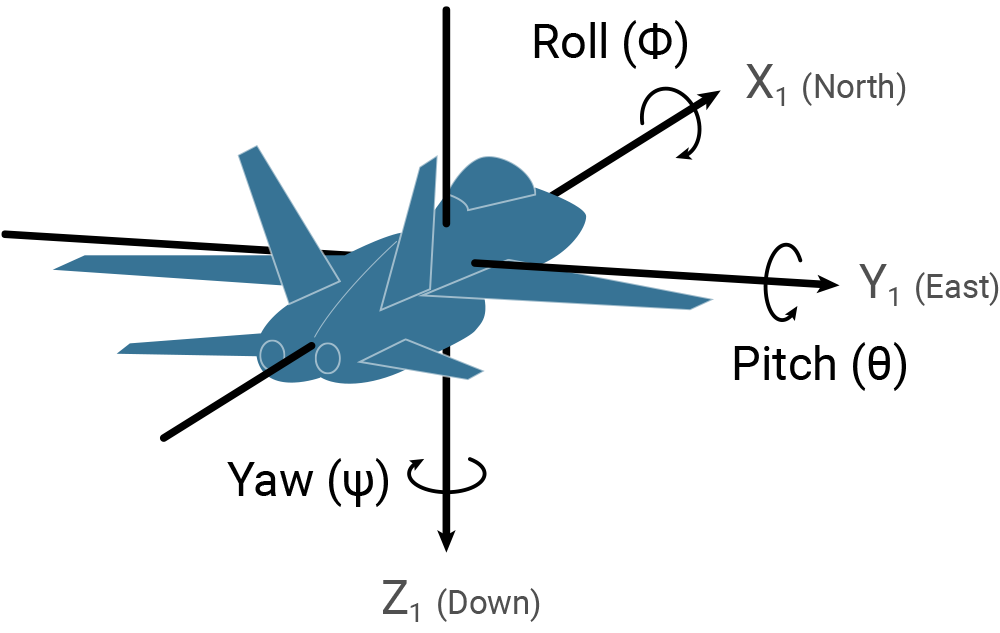
</div>

- Roll (Rotation about X-axis or the $1^{st}$ Axis):
$$
R_1(\phi) = \begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\phi & -\sin\phi \\
0 & \sin\phi & \cos\phi
\end{bmatrix}
$$

- Pitch (Rotation about Y-axis or the $2^{nd}$ Axis):
$$
R_2(\theta) = \begin{bmatrix}
\cos\theta & 0 & \sin\theta \\
0 & 1 & 0 \\
-\sin\theta & 0 & \cos\theta
\end{bmatrix}
$$

- Yaw (Rotation about Z-axis or the $3^{rd}$ Axis):
$$
R_3(\psi) = \begin{bmatrix}
\cos\psi & -\sin\psi & 0 \\
\sin\psi & \cos\psi & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

The typical positive conventions are: <ins>'Yaw right'</ins>, <ins>'pitch up'</ins> and <ins>'roll right'</ins>. 

Each of these rotation matrices above on its own is technically just a **single-axis DCM**. They serve as the building blocks for rotation sequences which will be discussed next...

In [6]:
'''
The definitions of Rotation Matrices
--------------------------------------------------------------------------------------------------------------------------------------------------------
    - The rotation abt the 1st principle axis (x-axis) is defined by the angle 'psi'
    - The rotation abt the 2nd principle axis (y-axis) is defined by the angle 'theta'
    - The rotation abt the 3rd principle axis (z-axis) is defined by the angle 'phi'
'''

def rotation_matrix_x(phi):
    """Generate rotation matrix for a roll (rotation about the x-axis)"""
    phi = (phi / 180) * np.pi
    c, s = np.cos(phi), np.sin(phi)
    return np.array([[1, 0, 0], 
                     [0, c, -s], 
                     [0, s, c]])

def rotation_matrix_y(theta):
    """Generate rotation matrix for a pitch (rotation about the y-axis)"""
    theta = (theta / 180) * np.pi
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, 0, s], 
                     [0, 1, 0], 
                     [-s, 0, c]])

def rotation_matrix_z(psi):
    """Generate rotation matrix for a yaw (rotation about the z-axis)"""
    psi = (psi / 180) * np.pi
    c, s = np.cos(psi), np.sin(psi)
    return np.array([[c, -s, 0], 
                     [s, c, 0], 
                     [0, 0, 1]])

### <ins>Composite Rotation Matrix and Rotation Sequences</ins>

Euler angles can be applied in sequences to rotate a rigid body in three-dimensional space. Each sequence results in a unique final orientation, described by a composite rotation matrix, commonly denoted as $\mathbf{C}$. The order of operations is crucial, following a right-to-left computation in matrix multiplication.

#### Symmetric and Asymmetric Sequences

Euler angles offer both symmetric and asymmetric rotation sequences, leading to 12 possible sequences in total. These sequences are defined by attributing numbers to the rotation axes:

- X-axis as the 1st axis
- Y-axis as the 2nd axis
- Z-axis as the 3rd axis

This convention avoids using axis names and instead represents sequences numerically, such as 3-2-1 instead of ZYX.

#### Possible Rotation Sequences:

Asymmetric (no axis repetition):
- 3-2-1
- 3-1-2
- 2-3-1
- 2-1-3
- 1-3-2
- 1-2-3

Symmetric (with axis repetition):
- 3-1-3
- 3-2-3
- 2-1-2
- 2-3-2
- 1-3-1
- 1-2-1

#### Forward Mapping and Computation

The term "forward mapping" refers to rotating from one frame to another using one of the 12 possible rotation sequences. The computation follows a right-to-left order, where for a 3-2-1 sequence, the matrix corresponding to the 3rd axis rotation is multiplied first, and the matrix for the 1st axis rotation is multiplied last.

This means, for a 3-2-1 sequence, the composite rotation matrix $\mathbf{C}$ is calculated as:
$$
C = R_1(\phi) R_2(\theta) R_3(\psi)
$$

where $R_{3}$, $R_{2}$, and $R_{1}$ are the rotation matrices for the 3rd, 2nd, and 1st axes, respectively.

#### Variability of the Composite Rotation Matrix

The elements of the composite rotation matrix $\mathbf{C}$ vary depending on the chosen rotation sequence. Each sequence will result in a different configuration of sine and cosine terms within the matrix. This variability underscores the importance of sequence selection, as it directly impacts the orientation outcome.

#### Determining Euler Angles

Euler angles can be extracted by examining the entries of the composite rotation matrix $\mathbf{C}$. The specific elements to look at depend on the rotation sequence used. This examination often involves inverse trigonometric functions and may require handling ambiguities or singularities, highlighting the need for careful sequence and angle determination.

--

The next few cells will focus on visualizing the concept of Euler angle by limited interactivity and animation. Use these codes to find potential pitfalls in understanding and even potentiall mistakes in the logic of the code

In [7]:
''' 
Visualizing Euler Angles through Rotating Frames
'''

def update_plotly_frame(theta_x_deg=0, theta_y_deg=0, theta_z_deg=0):
    
    # Define rotation matrices for each axis based on the input angles. These matrices rotate points/vectors in 3D space around the axes
    R_1 = rotation_matrix_x(theta_x_deg)                
    R_2 = rotation_matrix_y(theta_y_deg)           
    R_3 = rotation_matrix_z(theta_z_deg)

    # Defining Frames of Reference
    N_frame = np.eye(3)                          # Standard basis vectors of N-frame
    E_frame = N_frame                            # Base vectors for E-frame

    '''
    - Apply rotations in sequence, 3-2-1, relative to the current E-frame orientation
    - This means rotating around the E-frame's current axes, not the fixed N-frame axes
    - The entire function is called and thus all values are re-computed; inefficent
    '''
    E_frame = np.matmul(np.matmul(R_1, np.matmul(R_2, R_3)), E_frame)

    # Extracting individual vectors for plotting
    N_i, N_j, N_k = N_frame.T
    E_i, E_j, E_k = E_frame.T

    # Initialize the figure
    fig = go.Figure()

    # Preparing data for N-frame vectors (Dotted lines for static reference)
    n_vectors = [(N_i, 'N_i', 'red'), 
                 (N_j, 'N_j', 'green'), 
                 (N_k, 'N_k', 'blue')]
    for vec, name, color in n_vectors:
        fig.add_trace(go.Scatter3d(x=[0, vec[0]], 
                                   y=[0, vec[1]], 
                                   z=[0, vec[2]], 
                                   mode='lines+markers', 
                                   name=name, 
                                   marker=dict(color=color),
                                   line=dict(dash='dot', color=color)))  # Make N-frame dotted
    
    # Preparing data for E-frame vectors (Solid lines for rotated frame)
    e_vectors = [(E_i, 'E_i', 'red'), 
                 (E_j, 'E_j', 'green'), 
                 (E_k, 'E_k', 'blue')]
    for vec, name, color in e_vectors:
        fig.add_trace(go.Scatter3d(x=[0, vec[0]], 
                                   y=[0, vec[1]], 
                                   z=[0, vec[2]], 
                                   mode='lines+markers', 
                                   name=name, 
                                   marker=dict(color=color)))  # E-frame remains solid

    # Apply theme for better visual appearance and adjust figure size
    fig.update_layout(width=1000, 
                      height=800, 
                      template='presentation', 
                      scene=dict(aspectmode='cube',
                                 xaxis=dict(range=[-1, 1], autorange=False),
                                 yaxis=dict(range=[-1, 1], autorange=False),
                                 zaxis=dict(range=[-1, 1], autorange=False)),
                      title='Interactive N-frame and E-frame 3-2-1 Rotation Visualization')
    
    # Plot inline in Jupyter Notebook
    iplot(fig)

# Create interactive sliders for adjusting rotation angles in degrees
# Note that the sliders from the interact() function appears in order of the function arguments!!
interact(update_plotly_frame,
         theta_z_deg=FloatSlider(min=-180, max=180, step=1, value=0, description='Theta Z (deg)', continuous_update=False),
         theta_y_deg=FloatSlider(min=-180, max=180, step=1, value=0, description='Theta Y (deg)', continuous_update=False),
         theta_x_deg=FloatSlider(min=-180, max=180, step=1, value=0, description='Theta X (deg)', continuous_update=False))

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Theta X (deg)', max=180.0, …

<function __main__.update_plotly_frame(theta_x_deg=0, theta_y_deg=0, theta_z_deg=0)>

Note the following observations made in the the interactive visualization of cell 7:
- Once you apply all 3 rotation angles, and try to modify the angles, the frame rotates hapharzadly. Why? The function is simplistic for an initial visualization and does not account for state management, so modification of any angles halfway thru the interaction yields in total re-computation of the rotation matrix giving the appearance that the frame is rotating about some arbitray axis
- If you want to visualize a specific set of angles, reset all 3 values back to 0 degrees before inputting the new set of angles

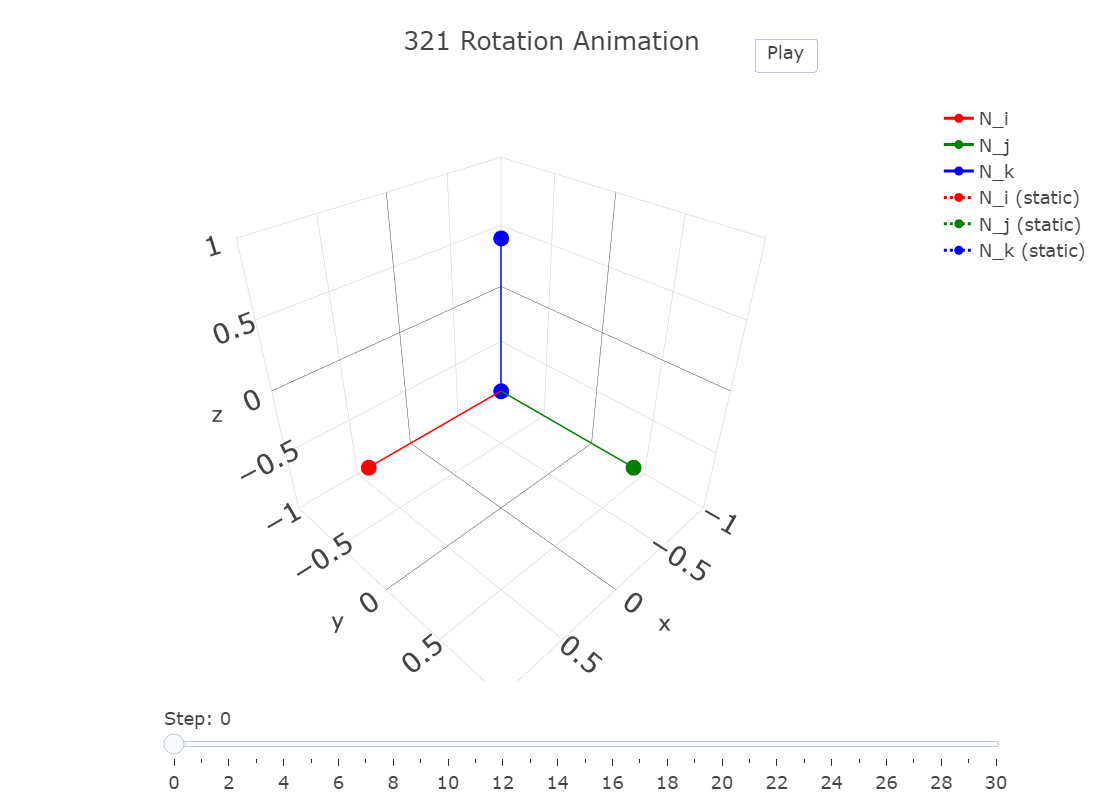

In [8]:
# Initialize the figure
fig = go.Figure()

# Initialize the identity matrix to represent the initial orientation of the N-frame
N_frame = np.eye(3)

# Transpose the identity matrix to get individual axis vectors (N_i, N_j, N_k)
N_i, N_j, N_k = N_frame.T

# Define a list of tuples containing the vector, its name, and its color
vectors = [(N_i, 'N_i', 'red'),
           (N_j, 'N_j', 'green'),
           (N_k, 'N_k', 'blue')]

# Iterate over each vector to add it as a trace to the figure
for vec, name, color in vectors:
    # Add a 3D scatter plot for each axis vector of the N-frame
    fig.add_trace(go.Scatter3d(x=[0, vec[0]], 
                               y=[0, vec[1]], 
                               z=[0, vec[2]],
                               mode='lines+markers',       # Combine line and marker modes
                               name=name,                  # Name of the trace as defined in vectors
                               marker=dict(color=color)))  # Color of the marker as defined in vectors

# Duplicate the N-frame traces with dotted lines for static display in the background
for vec, name, color in vectors:
    # Add dotted lines to visually represent the initial static N-frame
    fig.add_trace(go.Scatter3d(x=[0, vec[0]], 
                               y=[0, vec[1]], 
                               z=[0, vec[2]],
                               mode='lines+markers', 
                               name=name + " (static)", 
                               marker=dict(color=color),
                               line=dict(dash='dot', color=color)))  # Use 'dot' dash style for dotted lines

# Prepare to store animation frames
frames = []

# Define the total number of steps in the animation and calculate steps per rotation
steps = 30
steps_per_rotation = steps // 3  # Divide the total steps evenly among the sequence of rotations

# Target rotation angles (in degrees)
target_theta_x_deg, target_theta_y_deg, target_theta_z_deg = 45, 165, 45

# Loop through eaach step to create an animation frame
for frame in range(steps + 1):

    # Apply Z rotation for the first third of the animation
    if frame <= steps_per_rotation:
        '''Calculate the intermediate angle for Z rotation based on the current frame & Generate the rotation matrix for the current z angle'''
        theta_z_deg = (frame / steps_per_rotation) * target_theta_z_deg
        R = rotation_matrix_z(theta_z_deg)

    # Apply Y rotation for the second third of the animation
    elif frame <= 2 * steps_per_rotation:
        '''Calculate the intermediate Y rotation angle and generate the combined rotation matrix
           This combines the completed Z rotation with the current Y rotation, maintaining sequence order'''
        theta_y_deg = ((frame - steps_per_rotation) / steps_per_rotation) * target_theta_y_deg
        R = np.matmul(rotation_matrix_z(target_theta_z_deg), rotation_matrix_y(theta_y_deg))

    # Apply X rotation for the final third of the animation
    else:
        '''Calculate the intermediate X rotation angle and generate the combined rotation matrix
           This combines the completed Z rotation with the completed Y rotation with the current X rotation, maintaining sequence order'''
        theta_x_deg = ((frame - 2 * steps_per_rotation) / steps_per_rotation) * target_theta_x_deg
        R = np.matmul(np.matmul(rotation_matrix_z(target_theta_z_deg), rotation_matrix_y(target_theta_y_deg)), rotation_matrix_x(theta_x_deg))

    # Apply the rotation to the original N-frame basis vectors
    E_frame = [np.dot(R, vec) for vec in N_frame]
    
    # Prepare frame data for the current orientation of the E-frame
    frame_data = [go.Scatter3d(x=[0, E_frame[0][0]], y=[0, E_frame[0][1]], z=[0, E_frame[0][2]], mode='lines+markers', name='E_i', marker=dict(color='red')),
                  go.Scatter3d(x=[0, E_frame[1][0]], y=[0, E_frame[1][1]], z=[0, E_frame[1][2]], mode='lines+markers', name='E_j', marker=dict(color='green')),
                  go.Scatter3d(x=[0, E_frame[2][0]], y=[0, E_frame[2][1]], z=[0, E_frame[2][2]], mode='lines+markers', name='E_k', marker=dict(color='blue'))]

    # Add the prepared frame to the list of animation frames
    frames.append(go.Frame(data=frame_data, name=str(frame)))

# Add the created frames to the figure to form the animation
fig.frames = frames

# Add a slider and play button
fig.update_layout(updatemenus=[dict(type="buttons", 
                                    showactive=False, 
                                    y=1.05, x=0.8, 
                                    xanchor='left', 
                                    yanchor='bottom',
                                    buttons=[dict(label='Play',
                                                  method='animate',
                                                  args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True, mode='immediate')])])],
                  sliders=[dict(steps=[dict(method='animate', 
                                            args=[[f.name], dict(mode='immediate', frame=dict(duration=100, redraw=True), fromcurrent=True)], label=str(k)) for k, f in enumerate(fig.frames)], 
                                x=0.1, y=0, 
                                currentvalue=dict(visible=True, prefix='Step: '))])

# Set the layout
fig.update_layout(width=1000, 
                  height=800, 
                  template='presentation',
                  scene=dict(aspectmode='cube', 
                             xaxis=dict(range=[-1, 1], autorange=False),
                             yaxis=dict(range=[-1, 1], autorange=False), 
                             zaxis=dict(range=[-1, 1], autorange=False)),
                  title='321 Rotation Animation')

# Show the figure
iplot(fig)
#fig.write_html("rotation_animation.html")

- The objective of cell 8 is to mainly ascertain the validity in visualizing the Euler rotation sequences by means of animation as opposed to interaction
- Interactivity introduces a whole set of programming problems which may deviate the learners away from tackling the foundations of ADCS/AOCS such as Euler angle representations
- Furthermore, the constraint of animation ouput forces the user to think thru his/her desired rotation sequences, forcing users to get very familiar with internalizing Euler Angles and rotation sequences. Mainly, get very very comfortable with the concept of intermediate frames.
- With this in mind, the 'euler_rotation_animation' function in cell 9 is developed in tandem with ChatGPT

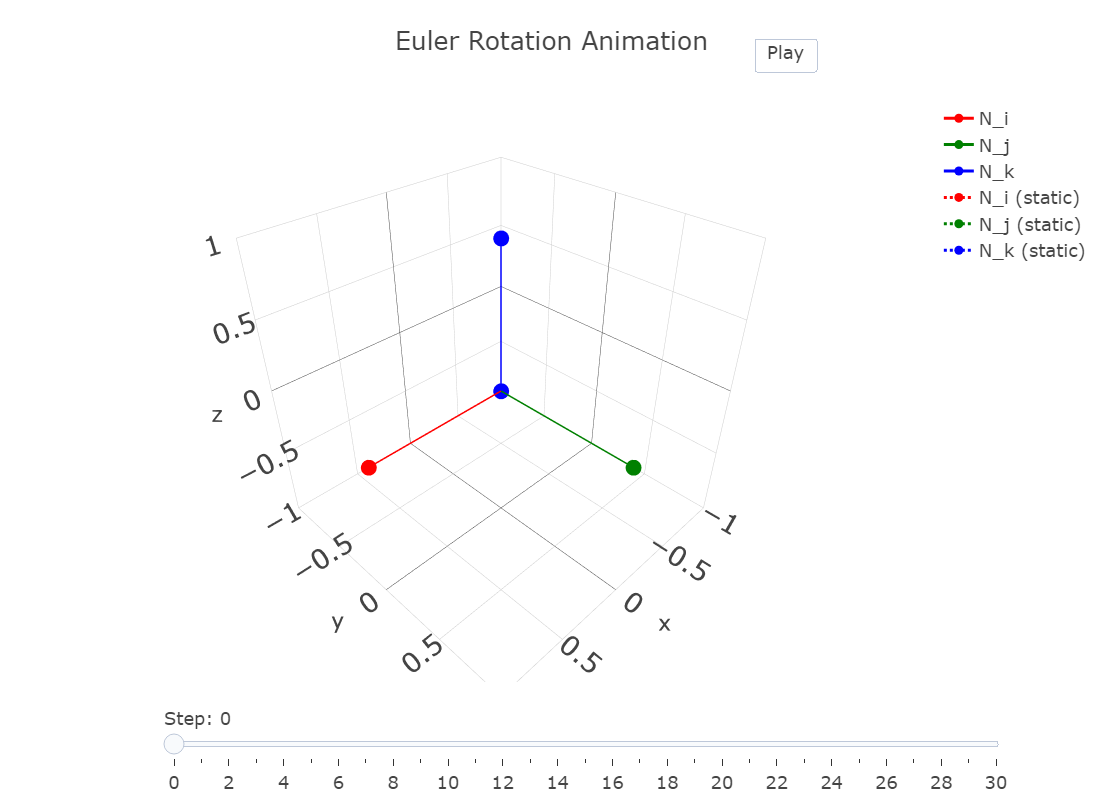

In [9]:
def euler_rotation_animation(rotation_sequence, target_theta_x_deg, target_theta_y_deg, target_theta_z_deg, steps=30):
    '''
    Creates a 3D animation of Euler rotations with the specified sequence and angles.
    
    Args:
        rotation_sequence (str): A string representing the desired rotation sequence (e.g., "123" for ZYX).
        target_theta_x_deg (float): The rotation angle about the X-axis in degrees.
        target_theta_y_deg (float): The rotation angle about the Y-axis in degrees.
        target_theta_z_deg (float): The rotation angle about the Z-axis in degrees.
        steps (int, optional): The total number of steps in the animation. Defaults to 30.
        
    Returns:
        plotly.graph_objects.Figure: The figure object containing the animation.

    Potential Future Improvements:
        - Refactor the code for readability; Chunk the code into sizeable descrete operations
        - Include error handling characters; for rotation_squence, anything other than '1', '2' and '3' in the sequence should raise a ValueError
        - See if the way the rotation is computed can be made more efficient; compute for the next frame from the previous frame
    '''
     # Initialize the figure for 3D visualization
    fig = go.Figure()

    # Create the identity matrix representing the initial orientation of the frame
    N_frame = np.eye(3)

    # Prepare vectors for plotting the initial frame orientation
    vectors = [(N_frame[:, i], f'N_{chr(105+i)}', color) for i, color in enumerate(['red', 'green', 'blue'])]

    # Plot initial frame vectors as dynamic traces
    for vec, name, color in vectors:
        fig.add_trace(go.Scatter3d(x=[0, vec[0]], 
                                   y=[0, vec[1]], 
                                   z=[0, vec[2]],
                                   mode='lines+markers', 
                                   name=name,
                                   marker=dict(color=color)))

    # Plot initial frame vectors as static traces for reference
    for vec, name, color in vectors:
        fig.add_trace(go.Scatter3d(x=[0, vec[0]], 
                                   y=[0, vec[1]], 
                                   z=[0, vec[2]],
                                   mode='lines+markers', 
                                   name=f"{name} (static)",
                                   marker=dict(color=color), 
                                   line=dict(dash='dot', color=color)))

    # Prepare to store animation frames and define animation parameters
    frames = []
    steps = 30

    # Map rotation sequence digits to corresponding rotation functions
    rotation_functions = {'1': rotation_matrix_x, 
                          '2': rotation_matrix_y, 
                          '3': rotation_matrix_z}
    
    # Map rotation sequence digits to target angles
    target_angles = {'1': target_theta_x_deg, 
                     '2': target_theta_y_deg, 
                     '3': target_theta_z_deg}

    # Calculate the number of steps allocated for each rotation in the sequence
    steps_per_rotation = steps // len(rotation_sequence) if rotation_sequence else steps

    # Generate each frame of the animation
    for frame in range(steps + 1):
        R = np.eye(3)              # Initialize rotation matrix as identity
        cumulative_steps = 0       # Track cumulative steps to manage sequence progression

        # Apply rotations according to the sequence
        for axis in rotation_sequence:
            # Determine the portion of the current axis rotation
            axis_steps = frame - cumulative_steps
            if axis_steps > steps_per_rotation:
                axis_steps = steps_per_rotation

            # Calculate the progress and corresponding angle for the current axis rotation
            progress = axis_steps / steps_per_rotation if steps_per_rotation else 0
            angle_deg = progress * target_angles[axis]

            # Update the rotation matrix for the current axis
            R = np.matmul(R, rotation_functions[axis](angle_deg))

            cumulative_steps += steps_per_rotation

            # Proceed to next axis rotation only after completing the current one
            if frame < cumulative_steps:
                break

        # Apply the cumulative rotation to the initial frame to get the current orientation
        E_frame = [np.matmul(R, vec) for vec in N_frame.T]

        # Prepare and add the frame data showing the current orientation
        frame_data = [go.Scatter3d(x=[0, vec[0]], 
                                   y=[0, vec[1]], 
                                   z=[0, vec[2]],
                                   mode='lines+markers', 
                                   name=f'E_{chr(105+i)}',
                                   marker=dict(color=color)) for i, (vec, color) in enumerate(zip(E_frame, ['red', 'green', 'blue']))]

        frames.append(go.Frame(data=frame_data, name=str(frame)))

    # Configure the figure with the generated frames
    fig.frames = frames

    # Add controls for animation playback and a slider for navigation
    fig.update_layout(updatemenus=[dict(type="buttons", 
                                        showactive=False, 
                                        y=1.05, 
                                        x=0.8,
                                        xanchor='left', 
                                        yanchor='bottom',
                                        buttons=[dict(label='Play', 
                                                      method='animate',
                                                      args=[None, dict(frame=dict(duration=100, redraw=True),
                                                                       fromcurrent=True, mode='immediate')])])],
                      sliders=[dict(steps=[dict(method='animate',
                                                args=[[f.name], 
                                                      dict(mode='immediate', 
                                                           frame=dict(duration=100, redraw=True),
                                                           fromcurrent=True)], 
                                                label=str(k)) for k, f in enumerate(fig.frames)],
                                    x=0.1, 
                                    y=0, 
                                    currentvalue=dict(visible=True, prefix='Step: '))])

    # Set the layout for the 3D scene
    fig.update_layout(width=1000, 
                      height=800, 
                      template='presentation',
                      scene=dict(aspectmode='cube', 
                                 xaxis=dict(range=[-1, 1], autorange=False),
                                 yaxis=dict(range=[-1, 1], autorange=False), 
                                 zaxis=dict(range=[-1, 1], autorange=False)),
                      title='Euler Rotation Animation')

    return fig


# Example usage:
fig = euler_rotation_animation('321', 45, 45, 45)
iplot(fig)

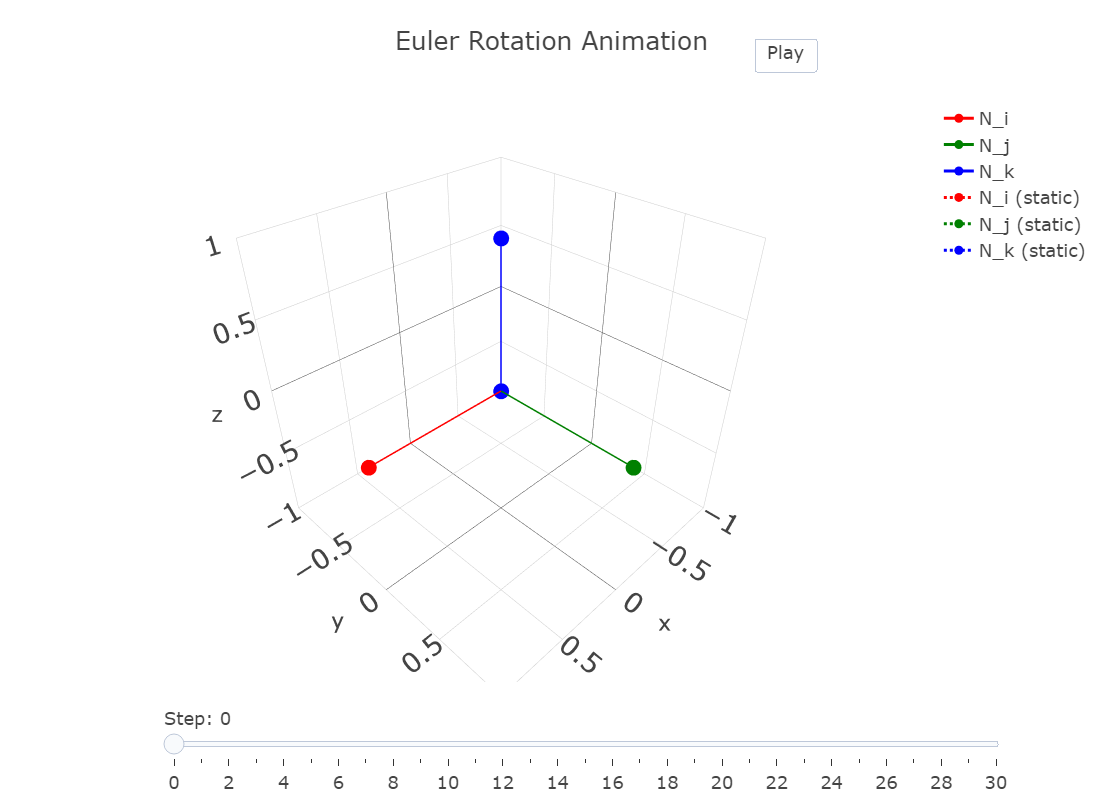

In [15]:
fig = euler_rotation_animation('321', 45, 90, 45)
iplot(fig)

### <ins>Singularities and Gimbal Lock</ins>

A notable limitation of using Euler angles for attitude representation is the phenomenon known as "gimbal lock." Gimbal lock occurs when two of the three axes in a set of Euler rotations become aligned, resulting in a loss of one degree of freedom. This alignment makes it impossible to distinguish between rotations about the aligned axes, effectively "locking" the gimbals.

#### Understanding Gimbal Lock

Imagine a gimbal system with three rings, each allowing for rotation around a specific axis. Gimbal lock happens when one ring is rotated such that it aligns with another, overlapping their axes of rotation. In terms of Euler angles, this often occurs when the $2^{nd}$ angle is rotated by ±90 degrees, aligning the roll and yaw axes. So in essence, using Euler angles means you are always 90 degress away from a singulairty problem

While our visualization accurately depicts the orientation of the object at all times, including at a pitch of 90 degrees, it's crucial to understand what gimbal lock implies. At a 90-degree pitch, the yaw and roll axes align, leading to a loss of one degree of freedom. This means that, although we can achieve the desired orientation, we lose the ability to independently command rotations about one axis. 
(visit this link for a better understanding visually: https://compsci290-s2016.github.io/CoursePage/Materials/EulerAnglesViz/)

This limitation is particularly problematic in fields requiring precise and independent control over all three axes of rotation, such as in aerospace and robotics. It's not the inability to reach certain orientations that defines gimbal lock but the loss of an independent rotational degree of freedom at certain orientations.

#### Implications

Gimbal lock presents a significant challenge in fields such as aerospace, robotics, and computer graphics, where precise control and representation of orientation are critical. The loss of a degree of freedom can lead to unexpected behavior, as the system can no longer differentiate between certain rotations. This limitation has led engineers and scientists to explore alternative representations, such as quaternions, which do not suffer from gimbal lock.
s.



# Week 3 - Rigid Body Kinematics II
1. Principal Rotation Vectors (PRVs)
2. Quaternions / Euler Parameters
3. Classical Rodrigues Parameters (CRPs)
4. Modified Rodrigues Parameters (MRPs)
5. Stereographic Orientation Parameters

## 3.1) Principal Rotation Vectors

An extension of Euler angles, the Principal Rotation Vector (PRV) avoids the singularity problem in Euler angle representation by having a 'special' vector, through which a single rotation allows an object to re-orient from one frame to another.

## 3.2) Quternions/Euler Parameters

## 3.3) Classical Rodrigues Parameters (CRPs)

## 3.4) Modified Rodrigues Parameters (MRPs)

## 3.5) Stereographic Orientation Parameters

# Week 4 - Static Attitude Determination
1. Attitude Determination Overview
2. Methods for Attitude Determination
3. Kinematics Final Assignment